# Enunciado

In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pycountry_convert as pycc
import ipywidgets as widgets
import datetime

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [2]:
def formatData(path):
    df = pd.read_csv(path, index_col = 'Country/Region') #Nombre de país como índice
    df.index.name = 'Country'
    df.drop(['Lat', 'Long'], axis = 1 ,inplace = True)
    col_list = [df.columns[0]] #provincias
    sum_days = {}                                            
    for i in range(1,df.shape[1],1):
        col_list.append(pd.Timestamp(df.columns[i]).date())
        sum_days[col_list[i]] = np.sum
    df.columns = col_list
    df = df.groupby('Country').aggregate(sum_days)
    return df

In [3]:
confirmados = formatData('data/covid19_confirmados.csv')
display(confirmados)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [4]:
population = pd.read_csv('data/poblacion_mundial2020.csv', index_col='Country (or dependency)')
population.index.name = 'Country'
display(population)
#display(population.columns)
# population.drop(['Yearly Change', 'Net Change','Density (P/Km²)','Land Area (Km²)',
#                 'Migrants (net)', 'Fert. Rate', 'Med. Age','Urban Pop %', 'World Share'], 
#                  axis = 1 ,inplace = True)

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country,,,,,,,,,,
China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...
Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %


In [5]:
p_confirmados = set(confirmados.index.values)
p_population = set(population.index.values)
#paises de confirmados que no se encuentran en population
print(list(p_confirmados-p_population))
#paises de population que no se encuentran en confirmados
print(list(p_population-p_confirmados))

['MS Zaandam', 'West Bank and Gaza', 'Taiwan*', 'Kosovo', 'Summer Olympics 2020', 'Saint Kitts and Nevis', 'Sao Tome and Principe', 'Czechia', 'Burma', 'Winter Olympics 2022', 'Antarctica', 'Korea, South', 'US', 'Diamond Princess', "Cote d'Ivoire", 'Congo (Brazzaville)', 'Saint Vincent and the Grenadines', 'Congo (Kinshasa)']
['Guam', 'Caribbean Netherlands', 'Mayotte', 'Curaçao', 'St. Vincent & Grenadines', 'Gibraltar', 'Cayman Islands', 'Guadeloupe', 'U.S. Virgin Islands', 'Saint Barthelemy', 'North Korea', 'French Guiana', 'French Polynesia', 'American Samoa', 'Macao', 'Turkmenistan', 'Northern Mariana Islands', 'Isle of Man', 'Niue', 'Hong Kong', 'Greenland', 'British Virgin Islands', 'United States', 'Sint Maarten', 'Bermuda', 'Faeroe Islands', 'Nauru', 'Montserrat', 'Saint Kitts & Nevis', 'Congo', 'Anguilla', 'New Caledonia', 'Channel Islands', 'Puerto Rico', 'Falkland Islands', 'Sao Tome & Principe', 'Wallis & Futuna', 'Martinique', 'Myanmar', 'Saint Martin', 'Saint Helena', 'Sa

Se reemplazan algunos nombres de paises del `Dataframe` `confirmados` y `population`

In [6]:
pc = {'Burma': 'Myanmar', 'Korea, South': 'South Korea', 'Taiwan*': 'Taiwan','US':'United States',
     'Saint Kitts and Nevis': 'Saint Kitts & Nevis', 'Saint Vincent and the Grenadines': 'St. Vincent & Grenadines',
     'Sao Tome and Principe': 'Sao Tome & Principe'}
pp = {'Czech Republic (Czechia)': 'Czechia','Congo': 'Congo (Brazzaville)','DR Congo': 'Congo (Kinshasa)'}

In [7]:
confirmados.index = confirmados.index.to_series().replace(pc)
population.index = population.index.to_series().replace(pp)

In [8]:
'Sao Tome & Principe' in confirmados.index

True

In [9]:
#paises de confirmados que no se encuentran en population
print(list(p_confirmados-p_population))
#paises de population que no se encuentran en confirmados
print(list(p_population-p_confirmados))

['MS Zaandam', 'West Bank and Gaza', 'Taiwan*', 'Kosovo', 'Summer Olympics 2020', 'Saint Kitts and Nevis', 'Sao Tome and Principe', 'Czechia', 'Burma', 'Winter Olympics 2022', 'Antarctica', 'Korea, South', 'US', 'Diamond Princess', "Cote d'Ivoire", 'Congo (Brazzaville)', 'Saint Vincent and the Grenadines', 'Congo (Kinshasa)']
['Guam', 'Caribbean Netherlands', 'Mayotte', 'Curaçao', 'St. Vincent & Grenadines', 'Gibraltar', 'Cayman Islands', 'Guadeloupe', 'U.S. Virgin Islands', 'Saint Barthelemy', 'North Korea', 'French Guiana', 'French Polynesia', 'American Samoa', 'Macao', 'Turkmenistan', 'Northern Mariana Islands', 'Isle of Man', 'Niue', 'Hong Kong', 'Greenland', 'British Virgin Islands', 'United States', 'Sint Maarten', 'Bermuda', 'Faeroe Islands', 'Nauru', 'Montserrat', 'Saint Kitts & Nevis', 'Congo', 'Anguilla', 'New Caledonia', 'Channel Islands', 'Puerto Rico', 'Falkland Islands', 'Sao Tome & Principe', 'Wallis & Futuna', 'Martinique', 'Myanmar', 'Saint Martin', 'Saint Helena', 'Sa

Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

In [10]:
def mg(df, population):
    return pd.merge(df, population, how = 'inner', on= 'Country')

In [11]:
confirmados = mg(confirmados, population)
display("Casos Confirmados: " ,confirmados)

'Casos Confirmados: '

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,2,2,2,2,2,2,2,2,2,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


Las filas en las cuales no se puede realizar el merge son aquellas en las que el `Country` no se encuentra en el Dataframe de population, estas son: `['Kosovo', 'Summer Olympics 2020', 'Winter Olympics 2022', 'MS Zaandam', 'Antarctica', 'West Bank and Gaza', 'Diamond Princess', "Cote d'Ivoire"]`

Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [12]:
recuperados = formatData('data/covid19_recuperados.csv')
recuperados.index = recuperados.index.to_series().replace(pc)
recuperados = mg(recuperados, population)
recuperados

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


In [13]:
muertes = formatData('data/covid19_muertes.csv')
muertes.index = muertes.index.to_series().replace(pc)
muertes = mg(muertes, population)
muertes

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [14]:
def datos_tasas(df_confirmados,df_recuperados,df_muertes,fecha):

    datetime = pd.Timestamp(fecha).date()

    df_confirmados['Tasa de incidencia'] = df_confirmados[pd.Timestamp(fecha).date()] * 100000 / df_confirmados['Population (2020)']
    df_recuperados['Tasa de recuperacion'] = df_recuperados[pd.Timestamp(fecha).date()] * 100000 / df_recuperados['Population (2020)']
    df_muertes['Tasa de mortalidad'] = df_muertes[pd.Timestamp(fecha).date()] * 100000 / df_muertes['Population (2020)']

    tasa_incidencia = df_confirmados['Tasa de incidencia'].squeeze()
    tasa_recuperacion = df_recuperados['Tasa de recuperacion'].squeeze()
    tasa_mortalidad = df_muertes['Tasa de mortalidad'].squeeze()

    return tasa_incidencia, tasa_recuperacion, tasa_mortalidad

In [15]:
## 22 de Enero de 2021
tasa_incidencia2021, tasa_recuperacion2021, tasa_mortalidad2021 = datos_tasas(confirmados,recuperados,muertes, '01/22/21')
print(f"Los países con la mayor y menor tasa de incidencia respectivamente son:  {tasa_incidencia2021.idxmax()} con un {round(tasa_incidencia2021.max(),1)}% y {tasa_incidencia2021.idxmin()} con un {tasa_incidencia2021.min()}%. Mientras que Chile tiene un {round(tasa_incidencia2021.get(key='Chile'),1)}%.")
print(f"Los países con la mayor y menor tasa de recuperación respectivamente son:  {tasa_recuperacion2021.idxmax()} con un {round(tasa_recuperacion2021.max(),1)}% y {tasa_recuperacion2021.idxmin()} con un {tasa_recuperacion2021.min()}%. Mientras que Chile tiene un {round(tasa_recuperacion2021.get(key='Chile'),1)}%.")
print(f"Los países con la mayor y menor tasa de mortalidad respectivamente son:  {tasa_mortalidad2021.idxmax()} con un {round(tasa_mortalidad2021.max(),1)}% y {tasa_mortalidad2021.idxmin()} con un {tasa_mortalidad2021.min()}%. Mientras que Chile tiene un {round(tasa_mortalidad2021.get(key='Chile'),1)}%.")

Los países con la mayor y menor tasa de incidencia respectivamente son:  Andorra con un 12183.2% y Kiribati con un 0.0%. Mientras que Chile tiene un 3604.5%.
Los países con la mayor y menor tasa de recuperación respectivamente son:  Andorra con un 11045.8% y Belgium con un 0.0%. Mientras que Chile tiene un 3369.3%.
Los países con la mayor y menor tasa de mortalidad respectivamente son:  Peru con un 299.4% y Cambodia con un 0.0%. Mientras que Chile tiene un 92.9%.


In [16]:
## 22 de Enero de 2022
tasa_incidencia2022, tasa_recuperacion2022, tasa_mortalidad2022 = datos_tasas(confirmados,recuperados,muertes, '01/22/22')
print(f"Los países con la mayor y menor tasa de incidencia respectivamente son:  {tasa_incidencia2022.idxmax()} con un {round(tasa_incidencia2022.max(),1)}% y {tasa_incidencia2022.idxmin()} con un {round(tasa_incidencia2022.min(),1)}%. Mientras que Chile tiene un {round(tasa_incidencia2022.get(key='Chile'),1)}%.")
print(f"Los países con la mayor y menor tasa de recuperación respectivamente son:  {tasa_recuperacion2022.idxmax()} con un {round(tasa_recuperacion2022.max(),1)}% y {tasa_recuperacion2022.idxmin()} con un {tasa_recuperacion2022.min()}%. Mientras que Chile tiene un {round(tasa_recuperacion2022.get(key='Chile'),1)}%.")
print(f"Los países con la mayor y menor tasa de mortalidad respectivamente son:  {tasa_mortalidad2022.idxmax()} con un {round(tasa_mortalidad2022.max(),1)}% y {tasa_mortalidad2022.idxmin()} con un {tasa_mortalidad2022.min()}%. Mientras que Chile tiene un {round(tasa_mortalidad2022.get(key='Chile'),1)}%.")

Los países con la mayor y menor tasa de incidencia respectivamente son:  Andorra con un 42730.3% y Micronesia con un 0.9%. Mientras que Chile tiene un 10183.9%.
Los países con la mayor y menor tasa de recuperación respectivamente son:  Afghanistan con un 0.0% y Afghanistan con un 0.0%. Mientras que Chile tiene un 0.0%.
Los países con la mayor y menor tasa de mortalidad respectivamente son:  Peru con un 617.7% y Holy See con un 0.0%. Mientras que Chile tiene un 206.3%.


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [17]:
def country2continent(country_name):
    country_code = pycc.country_name_to_country_alpha2(country_name, cn_name_format="default")
    continent_code = pycc.country_alpha2_to_continent_code(country_code)
    return country_code, continent_code

def addContinent(Series):

    continent_list = []
    country_list = []

    for country in Series.index:
            
            name = country
            if name == 'Congo (Brazzaville)' or name == 'Congo (Kinshasa)':
                name = 'Congo'     
            if name == 'Holy See' or name == 'Saint Kitts & Nevis' or name == 'Saint Kitts & Nevis' or name == 'St. Vincent & Grenadines' or name == 'Sao Tome & Principe' or name == 'Timor-Leste':
                continent_list.append('N/A')
                country_list.append('N/A')
                continue
            
            country, continent = country2continent(name)
            country_list.append(country)
            continent_list.append(continent)

    return country_list, continent_list

color_dict = {'OC': 'tab:blue', 'NA': 'tab:green', 'N/A': 'tab:gray', 'SA': 'tab:cyan', 'AF': 'tab:olive', 'EU': 'tab:purple', 'AS': 'tab:orange'}

def scatterPlot(figsize,df1,df2,tasa,country_incidencia):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    
    if tasa == 'mortalidad':
        ax.set_xlabel('Tasa de mortalidad [%] Enero 2021')
        ax.set_ylabel('Tasa de incidencia [%] Enero 2022')
        df1['Tasa de incidencia'] = df2['Tasa de incidencia']
        
        for k,d in df1.groupby('Continente'):
            size = [20]*len(d)
            if k == 'SA':
                size[3] = 250
            ax.scatter(d['Tasa de mortalidad'],d['Tasa de incidencia'], c=d['Continente'].map(color_dict),s=size,label=k)
        
    elif tasa == 'incidencia':
        ax.set_xlabel('Tasa de incidencia [%] Enero 2021')
        ax.set_ylabel('Tasa de incidencia [%] Enero 2022')
        df1['Tasa de incidencia 2'] = df2['Tasa de incidencia']
        
        for k,d in df1.groupby('Continente'):
            size = [20]*len(d)
            if k == 'SA':
                size[3] = 250
            ax.scatter(d['Tasa de incidencia'],d['Tasa de incidencia 2'], c=d['Continente'].map(color_dict),s=size, label=k)

    for xi, yi, text in zip(df1.iloc[:,0], df2.iloc[:,0], country_incidencia):
        ax.annotate(text,
                    xy=(xi, yi), xycoords='data',
                    xytext=(-10, -10), textcoords='offset points',
                    fontsize=9)
    ax.legend(loc='lower right')
    plt.show()
    return

In [18]:
country_tasa_incidencia2021, continent_tasa_incidencia2021 = addContinent(tasa_incidencia2021)
df_incidencia2021 = tasa_incidencia2021.to_frame()
df_incidencia2021['Continente'] = continent_tasa_incidencia2021
df_incidencia2021['País'] = country_tasa_incidencia2021
df_incidencia2021.head()

,Tasa de incidencia,Continente,País
Country,,,
Afghanistan,139.434431,AS,AF
Albania,2455.652798,EU,AL
Algeria,239.002001,AF,DZ
Andorra,12183.161463,EU,AD
Angola,58.334210,AF,AO


In [19]:
country_tasa_incidencia2022, continent_tasa_incidencia2022 = addContinent(tasa_incidencia2022)
df_incidencia2022 = tasa_incidencia2022.to_frame()
df_incidencia2022['Continente'] = continent_tasa_incidencia2022
df_incidencia2022['País'] = country_tasa_incidencia2022
df_incidencia2022.head()

,Tasa de incidencia,Continente,País
Country,,,
Afghanistan,408.319744,AS,AF
Albania,8564.182537,EU,AL
Algeria,533.223367,AF,DZ
Andorra,42730.342748,EU,AD
Angola,290.329929,AF,AO


In [20]:
country_tasa_mortalidad2021, continent_tasa_mortalidad2021 = addContinent(tasa_mortalidad2021)
df_mortalidad2021 = tasa_mortalidad2021.to_frame()
df_mortalidad2021['Continente'] = continent_tasa_mortalidad2021
df_mortalidad2021['País'] = country_tasa_mortalidad2021
df_mortalidad2021.head()

,Tasa de mortalidad,Continente,País
Country,,,
Afghanistan,6.065371,AS,AF
Albania,45.286471,EU,AL
Algeria,6.493186,AF,DZ
Andorra,120.330715,EU,AD
Angola,1.368367,AF,AO


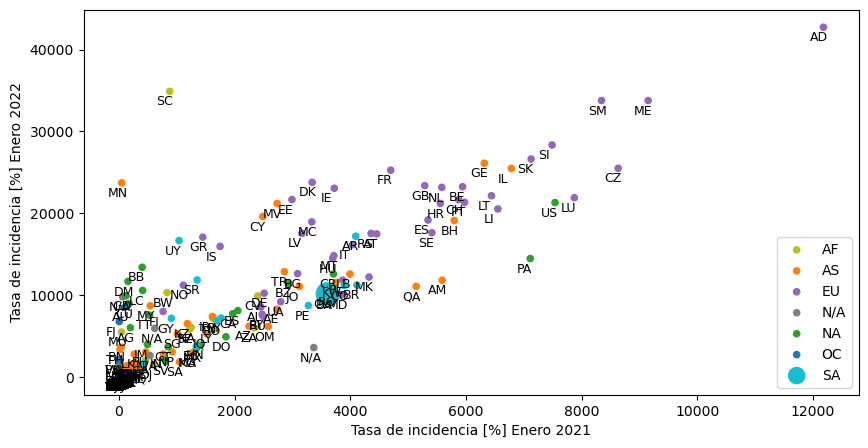

In [21]:
# Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022

scatterPlot((10,5),df_incidencia2021,df_incidencia2022,'incidencia',country_tasa_incidencia2021)

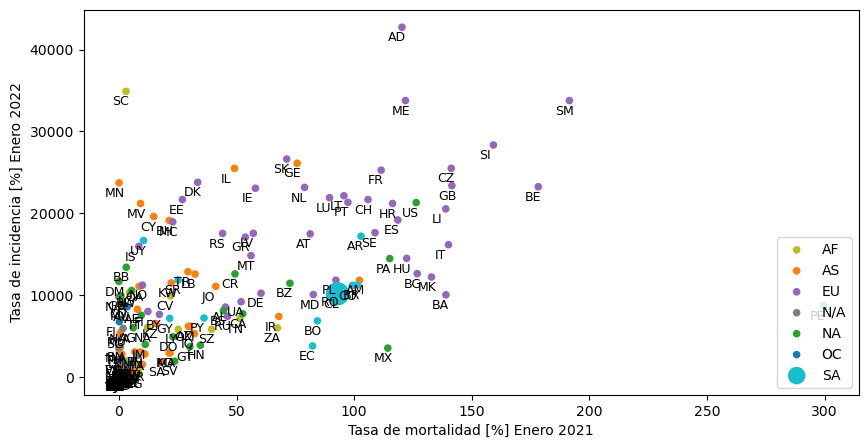

In [22]:
# Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022

scatterPlot((10,5),df_mortalidad2021,df_incidencia2022,'mortalidad',country_tasa_incidencia2021)

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


- En base a los datos procesador anteriormente, se puede concluir que la situación de Chile es muy similar a la de Rumania y Moldavia, esto se puede apreciar en ambos gráficos de nube de puntos.
- La situación de Chile es parecida a la de Colombia, Brasil y Argentina en ambas fechas, además, era muy parecida la tasa de incidencia de Perú en Enero 2021 y la tasa de mortalidad de Bolivia y Ecuador en Enero de 2022.
- De los países de la OCDE, se parece más a los países de Alemania, Colombia, Hungría e Irlanda.

## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



In [23]:
confirmados = formatData('data/covid19_confirmados.csv')
population.drop(['Yearly Change', 'Net Change','Density (P/Km²)','Land Area (Km²)',
                 'Migrants (net)', 'Fert. Rate', 'Med. Age','Urban Pop %', 'World Share'], 
                  axis = 1 ,inplace = True)
p_confirmados = set(confirmados.index.values)
p_population = set(population.index.values)

confirmados.index = confirmados.index.to_series().replace(pc)
population.index = population.index.to_series().replace(pp)

confirmados = mg(confirmados, population)

recuperados = formatData('data/covid19_recuperados.csv')
recuperados.index = recuperados.index.to_series().replace(pc)
recuperados = mg(recuperados, population)

muertes = formatData('data/covid19_muertes.csv')
muertes.index = muertes.index.to_series().replace(pc)
muertes = mg(muertes, population)

In [24]:
OCDE = ['Austria', 'Australia', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Denmark', 'Estonia',
        'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
        'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
        'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden',
        'Switzerland', 'Turkey', 'United States', 'United Kingdom', 'Slovakia', 'Czechia']

In [31]:
def acumulados(data, country, tipo, f):
    fecha = data.loc[country].index
    fecha = fecha[0:len(fecha)-1]
    casos = data.loc[country].values
    casos = casos[0:len(casos)-1]
    fecha = pd.to_datetime(fecha) 
    casos = pd.Series(casos, index=fecha)
    if tipo == 'Absolutos':
        if f == 'Semanal':
            casos = casos.groupby(pd.Grouper(freq='W-MON')).sum()
            return(casos.index, casos.values)
        else:
            return(fecha, casos)
    else:
        poblacion = data.loc[country, 'Population (2020)']
        casos_tasa = casos / poblacion * 100000  
        if f == 'Semanal':
            casos_tasa = casos_tasa.groupby(pd.Grouper(freq='W-MON')).sum()
            return(casos_tasa.index, casos_tasa.values)
        else:
            return(fecha, casos_tasa)

def nuevos(data, country, tipo,f):
    casos = data.drop(['Population (2020)'], axis=1)
    casos_pais = casos.loc[country]
    casos_nuevos = casos_pais.diff().fillna(casos_pais.iloc[0])
    casos_nuevos = casos_nuevos.clip(lower=0) 
    if tipo == 'Absolutos':
        fecha = casos_nuevos.index
        fecha = pd.to_datetime(fecha) 
        casos_nuevos = pd.Series(casos_nuevos.values, index=fecha)
        if f == 'Diario':
            return (fecha, casos_nuevos)
        else:
            #casos_nuevos = casos_nuevos.groupby(pd.Grouper(freq='W-MON')).sum()
            return(fecha, casos_nuevos)
    else:
        poblacion = data.loc[country, 'Population (2020)']
        casos_tasa = casos_nuevos / poblacion * 100000
        fecha = casos_tasa.index
        return (fecha, casos_tasa.values)

In [32]:
def generate_plot(data, c1, c2, caso, titulo, escala, frecuencia):
    fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
    
    if caso == "Acumulados":
        (c1_x, c1_y) = acumulados(data, c1, escala, frecuencia)
        (c2_x, c2_y) = acumulados(data, c2, escala, frecuencia)               
        ax.set(xlabel="Fecha", ylabel=f"Casos acumulados por {escala}")
    else:
        (c1_x, c1_y) = nuevos(data, c1, escala, frecuencia)
        (c2_x, c2_y) = nuevos(data, c2, escala, frecuencia)
        ax.set(xlabel="Fecha", ylabel=f"Casos nuevos por {escala}")
                        
    ax.plot(c1_x, c1_y, label=c1); ax.legend()
    ax.plot(c2_x, c2_y ,label=c2); ax.legend()
    ax.set_title(titulo, fontsize=18)
    plt.show()

def plot_confirmados(c1, c2, caso, escala, frecuencia):
    generate_plot(confirmados, c1, c2, caso, "Confirmados", escala, frecuencia)
    
def plot_recuperados(c1, c2, caso, escala, frecuencia):
    generate_plot(recuperados, c1, c2, caso, "Recuperados", escala, frecuencia)

def plot_decesos(c1, c2, caso, escala, frecuencia):
    generate_plot(muertes, c1, c2, caso, "Decesos", escala, frecuencia)

c1_dropdown = widgets.Dropdown(options=list(OCDE), description='País:', disabled=False)
c2_dropdown = widgets.Dropdown(options=list(OCDE), description='País:', disabled=False)
casos_dropdown = widgets.Dropdown(description="Casos:", options=["Nuevos", "Acumulados"])
escala_dropdown = widgets.Dropdown(description="Escala:", options=["Absolutos", "Relativos"])
frecuencia_dropdown = widgets.Dropdown(description="Frecuencia:", options=["Diarios", "Semanal"])

def action_1():
    widgets.interact(plot_confirmados, c1=c1_dropdown, c2=c2_dropdown, caso=casos_dropdown, escala=escala_dropdown, frecuencia=frecuencia_dropdown)

def action_2():
    widgets.interact(plot_recuperados, c1=c1_dropdown, c2=c2_dropdown, caso=casos_dropdown, escala=escala_dropdown, frecuencia=frecuencia_dropdown)

def action_3():
    widgets.interact(plot_decesos, c1=c1_dropdown, c2=c2_dropdown, caso=casos_dropdown, escala=escala_dropdown, frecuencia=frecuencia_dropdown)

out1 = widgets.interactive(action_1)
out2 = widgets.interactive(action_2)
out3 = widgets.interactive(action_3)

tab  = widgets.Tab(children=[out1, out2, out3])
tab.set_title(0, 'Confirmados')
tab.set_title(1, 'Recuperados')
tab.set_title(2, 'Muertes')

display(tab)

## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.